## ***Create SparkContext in Apache Spark version 1.x***

In [1]:
from pyspark import SparkContext

# Create a SparkContext object
sc = SparkContext(appName="MySparkApplication")

In [2]:
# Shut down the current active SparkContext
sc.stop()

## **Create SparkContext in Apache Spark version 2.x and later**

In [3]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder \
    .appName("MySparkApplication") \
    .getOrCreate()

# Get the SparkContext from the SparkSession
sc = spark.sparkContext

In [4]:
sc

<SparkContext master=local[*] appName=MySparkApplication>

In [5]:
data = [1,2,3,4,5,6]
rdd1 = sc.parallelize(data)
rdd1.collect()

[1, 2, 3, 4, 5, 6]

In [6]:
sc

<SparkContext master=local[*] appName=MySparkApplication>

In [7]:
print(rdd1.getNumPartitions())  # Default: Number of CPU cores


2


In [8]:
rdd1.count()

6

In [9]:
import multiprocessing

print("Available CPU cores:", multiprocessing.cpu_count())


Available CPU cores: 2


In [10]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Colab_Spark").getOrCreate()
sc = spark.sparkContext

data = list(range(1, 11))
rdd = sc.parallelize(data)
print(rdd.getNumPartitions())
print(rdd.glom().collect())


2
[[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]


In [11]:
import kagglehub
path = kagglehub.dataset_download("sudalairajkumar/novel-corona-virus-2019-dataset")

Using Colab cache for faster access to the 'novel-corona-virus-2019-dataset' dataset.


In [12]:
import os

# List files in the downloaded Kaggle dataset directory
print(os.listdir(path))

# Assuming 'covid_19_data.csv' is one of the files in the downloaded dataset, let's load it
file_to_load = os.path.join(path, 'covid_19_data.csv')
df = spark.read.csv(file_to_load, header=True, inferSchema=True)
df.show()

['time_series_covid_19_deaths_US.csv', 'time_series_covid_19_recovered.csv', 'time_series_covid_19_confirmed_US.csv', 'covid_19_data.csv', 'time_series_covid_19_confirmed.csv', 'time_series_covid_19_deaths.csv']
+---+---------------+--------------+--------------+---------------+---------+------+---------+
|SNo|ObservationDate|Province/State|Country/Region|    Last Update|Confirmed|Deaths|Recovered|
+---+---------------+--------------+--------------+---------------+---------+------+---------+
|  1|     01/22/2020|         Anhui|Mainland China|1/22/2020 17:00|      1.0|   0.0|      0.0|
|  2|     01/22/2020|       Beijing|Mainland China|1/22/2020 17:00|     14.0|   0.0|      0.0|
|  3|     01/22/2020|     Chongqing|Mainland China|1/22/2020 17:00|      6.0|   0.0|      0.0|
|  4|     01/22/2020|        Fujian|Mainland China|1/22/2020 17:00|      1.0|   0.0|      0.0|
|  5|     01/22/2020|         Gansu|Mainland China|1/22/2020 17:00|      0.0|   0.0|      0.0|
|  6|     01/22/2020|     Gu

In [13]:
df.printSchema()


root
 |-- SNo: integer (nullable = true)
 |-- ObservationDate: string (nullable = true)
 |-- Province/State: string (nullable = true)
 |-- Country/Region: string (nullable = true)
 |-- Last Update: string (nullable = true)
 |-- Confirmed: double (nullable = true)
 |-- Deaths: double (nullable = true)
 |-- Recovered: double (nullable = true)



In [14]:
df.select("Country/Region", "Deaths").groupBy("Country/Region").sum("Deaths").show(10)

+--------------+-----------+
|Country/Region|sum(Deaths)|
+--------------+-----------+
|          Chad|    41453.0|
|        Russia|1.8363719E7|
|      Paraguay|   819375.0|
| North Ireland|        0.0|
|         Yemen|   237613.0|
|       Senegal|   187805.0|
|        Sweden|  3336122.0|
|    Cabo Verde|    37708.0|
|      Kiribati|        0.0|
|        Guyana|    51147.0|
+--------------+-----------+
only showing top 10 rows


In [15]:
from pyspark.sql.functions import to_date

# Convert 'ObservationDate' to DateType
df = df.withColumn("ObservationDate", to_date(df["ObservationDate"], "MM/dd/yyyy"))

# Display the updated schema to confirm the change
df.printSchema()

# Show a few rows to see the effect
df.select("ObservationDate").show(5)

root
 |-- SNo: integer (nullable = true)
 |-- ObservationDate: date (nullable = true)
 |-- Province/State: string (nullable = true)
 |-- Country/Region: string (nullable = true)
 |-- Last Update: string (nullable = true)
 |-- Confirmed: double (nullable = true)
 |-- Deaths: double (nullable = true)
 |-- Recovered: double (nullable = true)

+---------------+
|ObservationDate|
+---------------+
|     2020-01-22|
|     2020-01-22|
|     2020-01-22|
|     2020-01-22|
|     2020-01-22|
+---------------+
only showing top 5 rows


In [16]:
print(df.dtypes)

[('SNo', 'int'), ('ObservationDate', 'date'), ('Province/State', 'string'), ('Country/Region', 'string'), ('Last Update', 'string'), ('Confirmed', 'double'), ('Deaths', 'double'), ('Recovered', 'double')]


In [19]:
from pyspark.sql.functions import sum, desc, col, format_number

df1 = df.select("Country/Region", "Deaths") \
  .groupBy("Country/Region") \
  .agg(sum("Deaths").alias("TotalDeaths"))

In [20]:
df1.show()

+--------------+-----------+
|Country/Region|TotalDeaths|
+--------------+-----------+
|          Chad|    41453.0|
|        Russia|1.8363719E7|
|      Paraguay|   819375.0|
| North Ireland|        0.0|
|         Yemen|   237613.0|
|       Senegal|   187805.0|
|        Sweden|  3336122.0|
|    Cabo Verde|    37708.0|
|      Kiribati|        0.0|
|        Guyana|    51147.0|
|   Philippines|  3089116.0|
|        Jersey|        0.0|
|       Eritrea|     1283.0|
|         Burma|   617121.0|
|      Djibouti|    25809.0|
|     Singapore|    11233.0|
|      Malaysia|   230112.0|
|          Fiji|      620.0|
|        Turkey|  6841158.0|
|        Malawi|   167294.0|
+--------------+-----------+
only showing top 20 rows


In [21]:
df1.filter(col('TotalDeaths') > 9000000).show()


+--------------+------------+
|Country/Region| TotalDeaths|
+--------------+------------+
|        Russia| 1.8363719E7|
|       Germany| 1.3364216E7|
|        France| 2.2720818E7|
|     Argentina| 1.2112441E7|
|          Peru| 1.3194771E7|
|         India| 4.4424723E7|
|         Italy| 2.6000702E7|
|         Spain| 1.9065104E7|
|            US|1.23303762E8|
|          Iran| 1.5744407E7|
|        Mexico| 4.3005509E7|
|            UK| 2.9171984E7|
|        Brazil|  7.262461E7|
|  South Africa| 1.0250036E7|
|      Colombia| 1.3981703E7|
+--------------+------------+



In [22]:
from pyspark.sql.functions import col, sum, when
df.select([sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in df.columns]).show()

+---+---------------+--------------+--------------+-----------+---------+------+---------+
|SNo|ObservationDate|Province/State|Country/Region|Last Update|Confirmed|Deaths|Recovered|
+---+---------------+--------------+--------------+-----------+---------+------+---------+
|  0|              0|         78100|             0|          0|        0|     0|        0|
+---+---------------+--------------+--------------+-----------+---------+------+---------+



In [23]:
#df1.orderBy("TotalDeaths").show()  # Ascending
df1.orderBy(col("TotalDeaths").desc()).show()  # Descending
# df.sort("age").show()  # Same as orderBy()


+--------------+------------+
|Country/Region| TotalDeaths|
+--------------+------------+
|            US|1.23303762E8|
|        Brazil|  7.262461E7|
|         India| 4.4424723E7|
|        Mexico| 4.3005509E7|
|            UK| 2.9171984E7|
|         Italy| 2.6000702E7|
|        France| 2.2720818E7|
|         Spain| 1.9065104E7|
|        Russia| 1.8363719E7|
|          Iran| 1.5744407E7|
|      Colombia| 1.3981703E7|
|       Germany| 1.3364216E7|
|          Peru| 1.3194771E7|
|     Argentina| 1.2112441E7|
|  South Africa| 1.0250036E7|
|        Poland|   8951676.0|
|     Indonesia|   7770329.0|
|        Turkey|   6841158.0|
|       Belgium|   6292525.0|
|       Ukraine|   6228387.0|
+--------------+------------+
only showing top 20 rows


In [24]:
early_cases = df.filter(col("Confirmed") > 0).orderBy("ObservationDate").limit(10)
early_cases.select("ObservationDate", "Country/Region", "Confirmed").show()

# Global first date
first_date = df.agg({"ObservationDate": "min"}).collect()[0][0]
print(f"First observation: {first_date}")

+---------------+--------------+---------+
|ObservationDate|Country/Region|Confirmed|
+---------------+--------------+---------+
|     2020-01-22|Mainland China|      1.0|
|     2020-01-22|Mainland China|     14.0|
|     2020-01-22|Mainland China|      6.0|
|     2020-01-22|Mainland China|      1.0|
|     2020-01-22|Mainland China|     26.0|
|     2020-01-22|Mainland China|      2.0|
|     2020-01-22|Mainland China|      1.0|
|     2020-01-22|Mainland China|      4.0|
|     2020-01-22|Mainland China|      1.0|
|     2020-01-22|Mainland China|      5.0|
+---------------+--------------+---------+

First observation: 2020-01-22


##The Whispering Spark (Jan 22, 2020)
On Day 1 of the data, the outbreak in Mainland China seems surprisingly small with most of the areas having a single-digit number of cases. Yet, these scattered records disclose the essential danger of the virus: the virus has already begun to spread to multiple provinces. The fire has not begun in just one location; it has already started seeding the ground for the explosive growth to come.

In [25]:
from pyspark.sql.functions import col, sum

# Filter the DataFrame for the first observation date
df_first_date = df.filter(col("ObservationDate") == first_date)

# Calculate the sum of confirmed cases for the first date
sum_first_date_confirmed = df_first_date.agg(sum("Confirmed").alias("TotalConfirmedOnFirstDate"))

# Show the result
sum_first_date_confirmed.show()

+-------------------------+
|TotalConfirmedOnFirstDate|
+-------------------------+
|                    557.0|
+-------------------------+



##The Hidden Magnitude
The individual graphs may have only registered a few small sparks (1s and 2s), but if we add up the totals on Day 1, we see the astonishing truth that 557 confirmed cases were already out there. So the outbreak was not a growing phenomenon. It was already big when we began to measure it. The whisper we had not noticed was a shout.

In [26]:
from pyspark.sql import SparkSession
from pyspark.sql.window import Window
from pyspark.sql.functions import col, sum, lag, to_date, when

# 1. CLEAN THE DATE (Crucial Step)
# If ObservationDate is a string, sorting might be wrong (e.g. "10/..." comes before "2/...").
# Convert it to actual DateType first.
df_clean = df.withColumn("ObservationDate", to_date(col("ObservationDate"), "MM/dd/yyyy"))

# 2. AGGREGATE FIRST (The Fix)
# Collapse all Provinces into one row per Country per Date
daily_cumulative = df_clean.groupBy("Country/Region", "ObservationDate") \
                           .agg(sum("Confirmed").alias("TotalConfirmed"))

# 3. APPLY WINDOW
# Now we compare "US Total Jan 23" vs "US Total Jan 22"
window_spec = Window.partitionBy("Country/Region").orderBy("ObservationDate")

df_calculated = daily_cumulative.withColumn(
    "DailyNewCases",
    col("TotalConfirmed") - lag("TotalConfirmed", 1, 0).over(window_spec)
)

# 4. HANDLE DATA CORRECTIONS (Optional Polish)
# If real data has corrections (negative numbers), clamp them to 0 for plotting
df_final = df_calculated.withColumn(
    "DailyNewCases",
    when(col("DailyNewCases") < 0, 0).otherwise(col("DailyNewCases"))
)

# 5. FINAL AGGREGATION (Global Daily)
# Now sum up all countries to get the World Daily New Cases
world_daily = df_final.groupBy("ObservationDate") \
                      .agg(sum("DailyNewCases").alias("WorldNewCases")) \
                      .orderBy("ObservationDate")

world_daily.show(20)

+---------------+-------------+
|ObservationDate|WorldNewCases|
+---------------+-------------+
|     2020-01-22|        557.0|
|     2020-01-23|        541.0|
|     2020-01-24|         10.0|
|     2020-01-25|        496.0|
|     2020-01-26|        681.0|
|     2020-01-27|        809.0|
|     2020-01-28|       2652.0|
|     2020-01-29|        587.0|
|     2020-01-30|       2070.0|
|     2020-01-31|       1690.0|
|     2020-02-01|       2113.0|
|     2020-02-02|       4749.0|
|     2020-02-03|       3094.0|
|     2020-02-04|       4011.0|
|     2020-02-05|       3744.0|
|     2020-02-06|       3182.0|
|     2020-02-07|       3594.0|
|     2020-02-08|       2729.0|
|     2020-02-09|       3030.0|
|     2020-02-10|       2612.0|
+---------------+-------------+
only showing top 20 rows


##The Dam Breaks (Jan 22 - Feb 10)
The opening "steady state" of ~500 cases per day is violently upended on Jan 28 as the number of cases increases 4x the next day. By Feb 2, not only has the dam been broken, with a terror-inducing 4,800+ cases the very next day. The ambiguous fluctuations (such as Jan 24) notwithstanding, the fact remains: the virus is no longer knocking—itis has kicked down the door.

In [27]:
from pyspark.sql.functions import col
import pandas as pd

# Define the dates to filter for
requested_dates = [pd.to_datetime('2020-01-23').date(), pd.to_datetime('2020-01-24').date()]

# Filter the DataFrame by ObservationDate and select requested columns
daily_summary = df.filter(col("ObservationDate").isin(requested_dates)) \
                  .select("ObservationDate", "Confirmed", "Deaths", "Recovered") \
                  .orderBy("ObservationDate")

daily_summary.show()

+---------------+---------+------+---------+
|ObservationDate|Confirmed|Deaths|Recovered|
+---------------+---------+------+---------+
|     2020-01-23|      9.0|   0.0|      0.0|
|     2020-01-23|     22.0|   0.0|      0.0|
|     2020-01-23|      9.0|   0.0|      0.0|
|     2020-01-23|      5.0|   0.0|      0.0|
|     2020-01-23|      2.0|   0.0|      0.0|
|     2020-01-23|     32.0|   0.0|      2.0|
|     2020-01-23|      5.0|   0.0|      0.0|
|     2020-01-23|      3.0|   0.0|      0.0|
|     2020-01-23|      5.0|   0.0|      0.0|
|     2020-01-23|    444.0|  17.0|     28.0|
|     2020-01-23|      2.0|   0.0|      0.0|
|     2020-01-23|      5.0|   0.0|      0.0|
|     2020-01-23|      2.0|   0.0|      0.0|
|     2020-01-23|    444.0|  17.0|     28.0|
|     2020-01-23|      9.0|   0.0|      0.0|
|     2020-01-23|      0.0|   0.0|      0.0|
|     2020-01-23|      5.0|   0.0|      0.0|
|     2020-01-23|      7.0|   0.0|      0.0|
|     2020-01-23|      1.0|   0.0|      0.0|
|     2020

In [28]:
from pyspark.sql.functions import sum

# Group by ObservationDate and sum Confirmed, Deaths, Recovered
daily_totals = daily_summary.groupBy("ObservationDate") \
                            .agg(
                                sum("Confirmed").alias("TotalConfirmed"),
                                sum("Deaths").alias("TotalDeaths"),
                                sum("Recovered").alias("TotalRecovered")
                            ) \
                            .orderBy("ObservationDate")

daily_totals.show()

+---------------+--------------+-----------+--------------+
|ObservationDate|TotalConfirmed|TotalDeaths|TotalRecovered|
+---------------+--------------+-----------+--------------+
|     2020-01-23|        1097.0|       34.0|          60.0|
|     2020-01-24|         941.0|       26.0|          39.0|
+---------------+--------------+-----------+--------------+



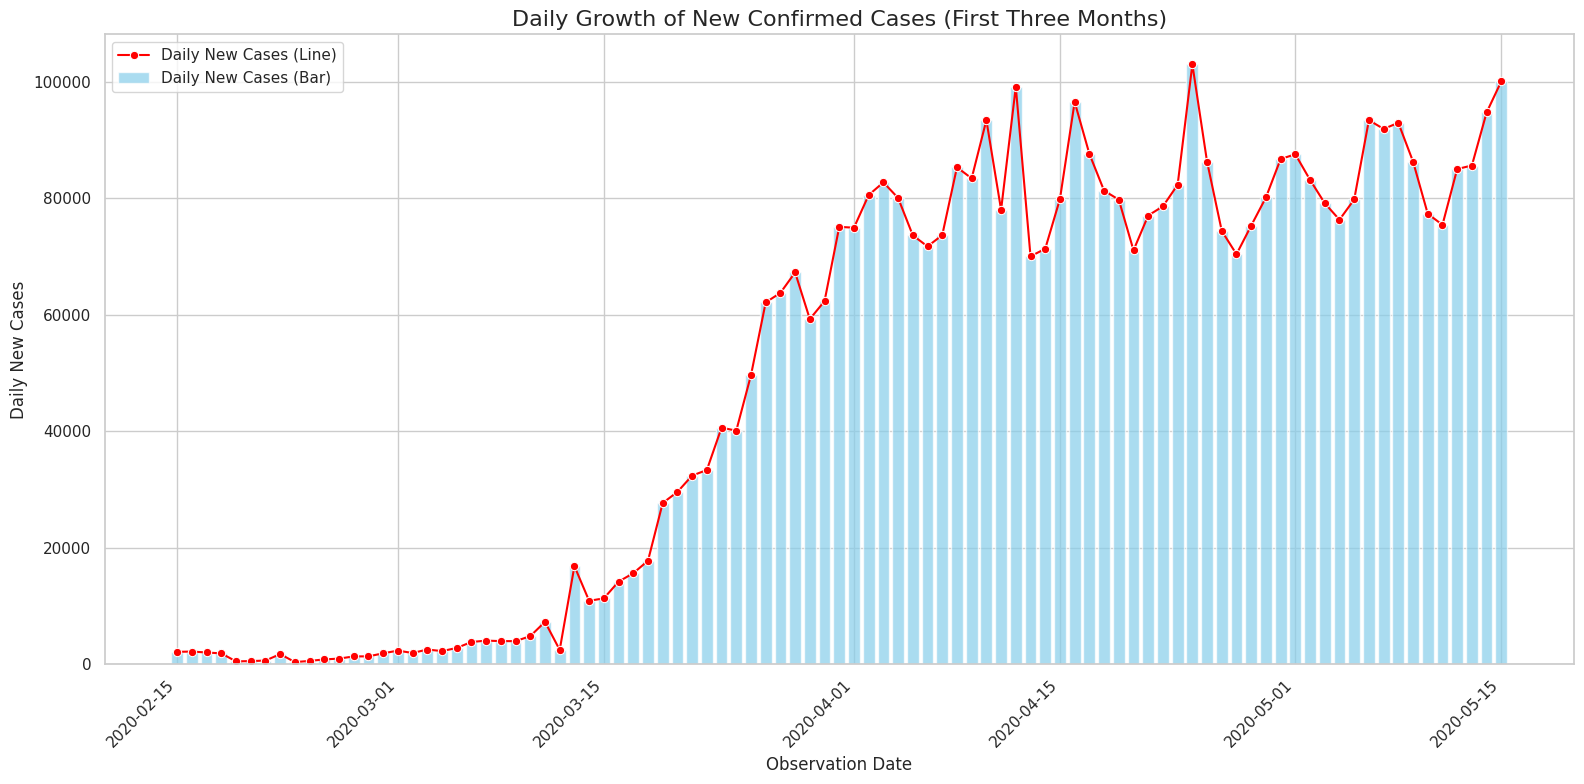

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.dates as mdates # Import matplotlib.dates

# Convert the daily_growth Spark DataFrame to Pandas DataFrame for plotting
daily_growth_pd = world_daily.toPandas()

# Explicitly ensure 'ObservationDate' is a datetime object
daily_growth_pd['ObservationDate'] = pd.to_datetime(daily_growth_pd['ObservationDate'])

# Filter for the first three months of the data's start year (2020)
start_year = daily_growth_pd['ObservationDate'].min().year
start_date_q1 = pd.to_datetime(f'{start_year}-02-15')
end_date_q1 = pd.to_datetime(f'{start_year}-05-15')

daily_growth_q1_pd = daily_growth_pd[
    (daily_growth_pd['ObservationDate'] >= start_date_q1) &
    (daily_growth_pd['ObservationDate'] <= end_date_q1)
]

# Set the style for the plot
sns.set_theme(style="whitegrid")

plt.figure(figsize=(16, 8))

# Get the current axes object
ax = plt.gca()

ax.bar(daily_growth_q1_pd['ObservationDate'], daily_growth_q1_pd['WorldNewCases'], color='skyblue', alpha=0.7, label='Daily New Cases (Bar)', width=pd.Timedelta(days=0.8))

# Plotting the daily new cases as a line chart to show trend
sns.lineplot(x='ObservationDate', y='WorldNewCases', data=daily_growth_q1_pd, color='red', marker='o', label='Daily New Cases (Line)', ax=ax)

plt.title('Daily Growth of New Confirmed Cases (First Three Months)', fontsize=16)
plt.xlabel('Observation Date', fontsize=12)
plt.ylabel('Daily New Cases', fontsize=12)

# Apply Matplotlib's date locators and formatters to ensure proper date handling
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # Example format

plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()

##The Vertical Wall (Feb - May 2020)
The graph shows clearly the "silent spread" of February, in which the line clings to the bottom. But of course, come the middle of March, all of that goes out the window. The line does not merely increase; it goes up a vertical wall, shooting up to 100,000 per day in short weeks. And by the time April rolls around, the "spike" is no longer a "spike." We're not winning; we're merely fighting to keep the "ceiling" from falling any further. Add the main spike after the middle of March.

In [30]:
from pyspark.sql import functions as F

max_date = df.select(F.max("ObservationDate")).collect()[0][0]
print(f"Latest Date in Dataset: {max_date}")

# Filter for only that date
df_latest = df.filter(F.col("ObservationDate") == max_date)

# Group by Country, Sum Provinces, and Sort
top_10_countries = df_latest.groupBy("Country/Region") \
    .agg(F.sum("Confirmed").alias("TotalConfirmed")) \
    .orderBy(F.col("TotalConfirmed").desc()) \
    .limit(10)

top_10_countries.show()

Latest Date in Dataset: 2021-05-29
+--------------+--------------+
|Country/Region|TotalConfirmed|
+--------------+--------------+
|            US|   3.3251939E7|
|         India|     2.78948E7|
|        Brazil|     1.64716E7|
|        France|     5719877.0|
|        Turkey|     5235978.0|
|        Russia|     4995613.0|
|            UK|     4496823.0|
|         Italy|     4213055.0|
|     Argentina|     3732263.0|
|       Germany|     3684672.0|
+--------------+--------------+



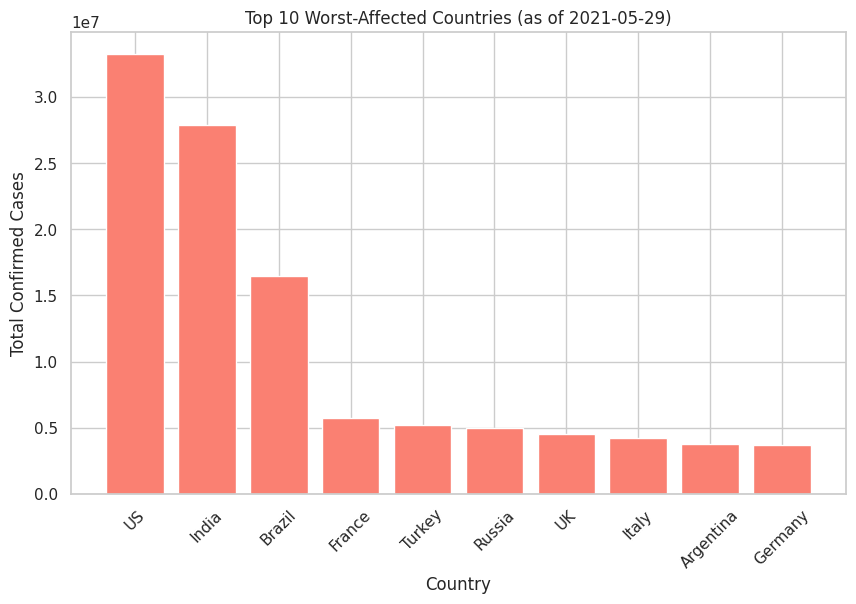

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert to Pandas (Safe because it's only 10 rows)
pdf_top10 = top_10_countries.toPandas()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(pdf_top10["Country/Region"], pdf_top10["TotalConfirmed"], color="salmon")
plt.xlabel("Country")
plt.ylabel("Total Confirmed Cases")
plt.title(f"Top 10 Worst-Affected Countries (as of {max_date})")
plt.xticks(rotation=45)
plt.show()

##The Tragic Triumvirate (May 2021)
By May 2021, the grim hierarchy has crystallized: the US, India, and Brazil have come to be distinguished from the rest of the world-a "Tier 1" of devastation. The chasm has become surreal: the gap between Brazil at #3 and France at #4 is almost 11 million cases-a chasm bigger than the combined total cases of France and Turkey. This isn't a list; it's a portrait of three nations bearing the heaviest weight of the pandemic.

In [32]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

spark = SparkSession.builder.appName("CovidRates").getOrCreate()

# 1. Get the Latest Date (Snapshot)
max_date = df.select(F.max("ObservationDate")).collect()[0][0]
print(f"Calculating rates as of: {max_date}")

# 2. Filter & Aggregate by Country
df_latest = df.filter(F.col("ObservationDate") == max_date)

country_stats = df_latest.groupBy("Country/Region").agg(
    F.sum("Confirmed").alias("TotalConfirmed"),
    F.sum("Deaths").alias("TotalDeaths"),
    F.sum("Recovered").alias("TotalRecovered")
)

# 3. Calculate Rates (Handle division by zero with F.when)
# We calculate percentages and round to 2 decimal places
df_rates = country_stats.withColumn(
    "MortalityRate",
    F.round((F.col("TotalDeaths") / F.col("TotalConfirmed")) * 100, 2)
).withColumn(
    "RecoveryRate",
    F.round((F.col("TotalRecovered") / F.col("TotalConfirmed")) * 100, 2)
)

# 4. Show Countries with Highest Mortality
print("Top 10 Countries by Mortality Rate:")
df_rates.select("Country/Region", "TotalConfirmed", "MortalityRate", "RecoveryRate") \
        .filter(F.col("TotalConfirmed") > 1000) \
        .orderBy(F.col("MortalityRate").desc()) \
        .show(10)


Calculating rates as of: 2021-05-29
Top 10 Countries by Mortality Rate:
+--------------------+--------------+-------------+------------+
|      Country/Region|TotalConfirmed|MortalityRate|RecoveryRate|
+--------------------+--------------+-------------+------------+
|               Yemen|        6731.0|         19.6|        50.5|
|              Mexico|     2411503.0|         9.27|       79.82|
|               Sudan|       35289.0|         7.37|        79.2|
|               Syria|       24440.0|         7.21|       88.35|
|               Egypt|      260659.0|         5.76|       73.46|
|             Somalia|       14653.0|         5.24|        45.9|
|      Mainland China|       91072.0|         5.09|       94.56|
|             Ecuador|      424741.0|         4.82|       86.27|
|Bosnia and Herzeg...|      203839.0|         4.52|       85.48|
|            Bulgaria|      418221.0|         4.22|       90.95|
+--------------------+--------------+-------------+------------+
only showing top 1

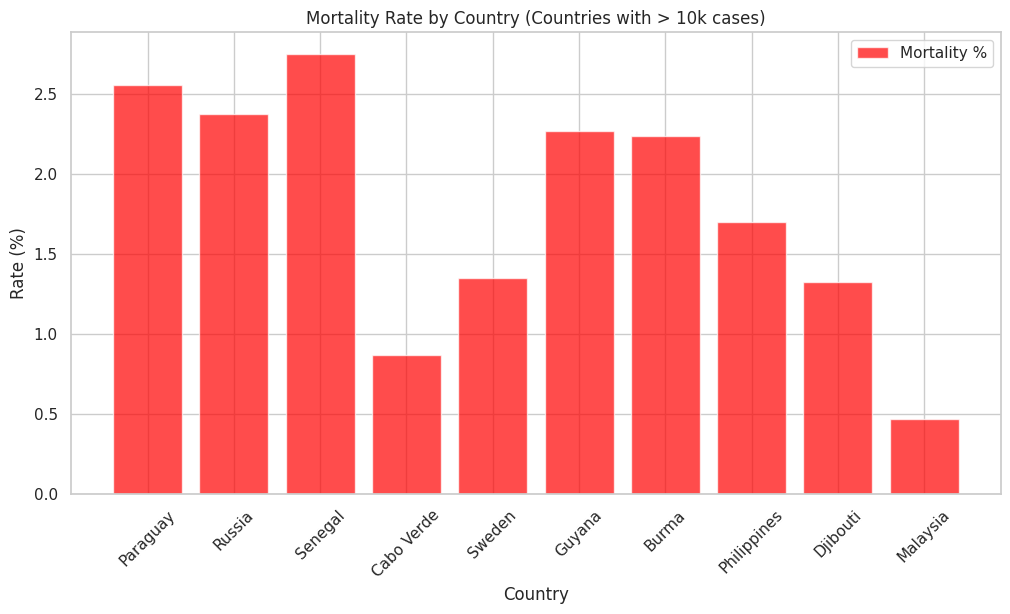

In [33]:
# Optional: Plotting with Pandas/Matplotlib
pdf = df_rates.filter(F.col("TotalConfirmed") > 10000).toPandas()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
# Plot Mortality
plt.bar(pdf["Country/Region"][:10], pdf["MortalityRate"][:10], color="red", alpha=0.7, label="Mortality %")
plt.xlabel("Country")
plt.ylabel("Rate (%)")
plt.title("Mortality Rate by Country (Countries with > 10k cases)")
plt.legend()
plt.xticks(rotation=45)
plt.show()

##The Inequality of Survival (May 2021)
This table shows us a bitter truth: the virus prospers where it can. Yemen shows a staggering 19.6% mortality rate, meaning almost 1 in 5 people die from the virus. They report only ~6,700 cases of the coronavirus because only the dying are being recorded. Mexico is another sad note of record-high percentages because, unlike conflict areas such as Syria and Sudan where data is smaller due to conflict, Mexico has suffered from an enormous outbreak of 2.4M cases but an equally staggering 9.3% mortality.

In [34]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

spark = SparkSession.builder.appName("GlobalActiveCases").getOrCreate()

# 1. Clean the Date (Crucial for correct time-series sorting)
# Assuming date format is MM/dd/yyyy. Adjust if your dataset is yyyy-MM-dd.
df_clean = df.withColumn("ObservationDate", F.to_date(F.col("ObservationDate"), "MM/dd/yyyy"))

# 2. Aggregate Globally by Date
global_daily = df_clean.groupBy("ObservationDate") \
    .agg(
        F.sum("Confirmed").alias("TotalConfirmed"),
        F.sum("Deaths").alias("TotalDeaths"),
        F.sum("Recovered").alias("TotalRecovered")
    )

# 3. Calculate Active Cases
# Active = People currently infected (Total - Dead - Recovered)
df_trends = global_daily.withColumn(
    "Active",
    F.col("TotalConfirmed") - (F.col("TotalDeaths") + F.col("TotalRecovered"))
).orderBy("ObservationDate")

# 4. View the Result (e.g., April 2020 Peak)
print("Global Active Cases Over Time:")
df_trends.show(10)

Global Active Cases Over Time:
+---------------+--------------+-----------+--------------+------+
|ObservationDate|TotalConfirmed|TotalDeaths|TotalRecovered|Active|
+---------------+--------------+-----------+--------------+------+
|     2020-01-22|         557.0|       17.0|          30.0| 510.0|
|     2020-01-23|        1097.0|       34.0|          60.0|1003.0|
|     2020-01-24|         941.0|       26.0|          39.0| 876.0|
|     2020-01-25|        1437.0|       42.0|          42.0|1353.0|
|     2020-01-26|        2118.0|       56.0|          56.0|2006.0|
|     2020-01-27|        2927.0|       82.0|          65.0|2780.0|
|     2020-01-28|        5578.0|      131.0|         108.0|5339.0|
|     2020-01-29|        6165.0|      133.0|         127.0|5905.0|
|     2020-01-30|        8235.0|      171.0|         145.0|7919.0|
|     2020-01-31|        9925.0|      213.0|         225.0|9487.0|
+---------------+--------------+-----------+--------------+------+
only showing top 10 rows


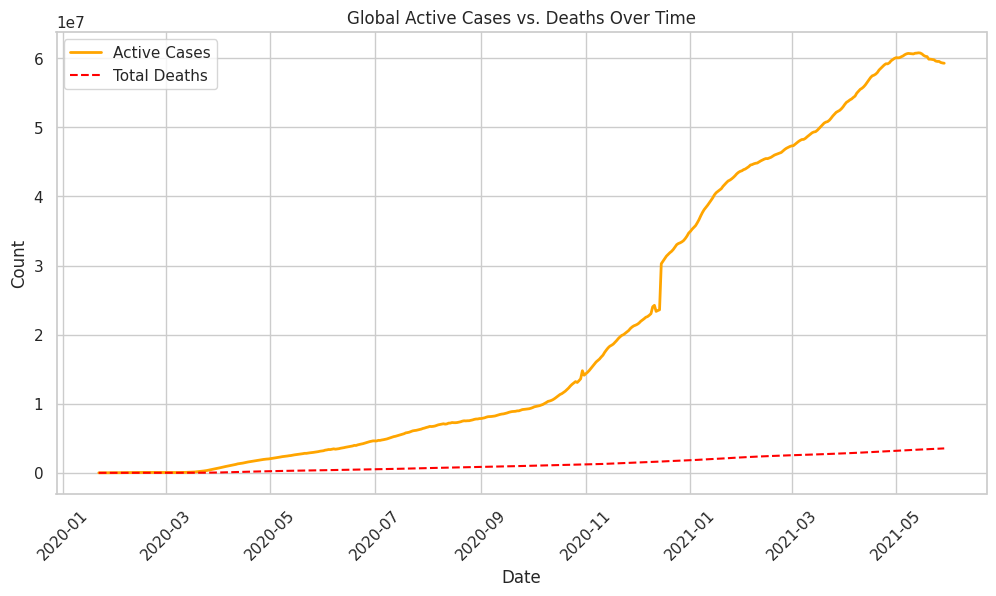

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert to Pandas (Safe: It's only ~500 rows)
pdf_trends = df_trends.toPandas()

# Plot
plt.figure(figsize=(12, 6))

# Plot Active Cases (The "Wave")
plt.plot(pdf_trends["ObservationDate"], pdf_trends["Active"], label="Active Cases", color="orange", linewidth=2)

# Plot Total Deaths (The "Toll")
plt.plot(pdf_trends["ObservationDate"], pdf_trends["TotalDeaths"], label="Total Deaths", color="red", linestyle="--")

plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Global Active Cases vs. Deaths Over Time")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

##Peak active cases in April 2020 (~2M), with deaths surpassing recoveries initially, painting a picture of overwhelmed systems.

The Chaotic Plateau (Daily Growth) This graph represents and illustrates that exact moment when containment officially stopped working. The "flatline" of February was not a calm before a storm, it was deafening silence; that vertical growth of mid-March was the alarm ringing. When we look at April, there was no defined "peak" and subsequent rebound, only a chaotic plateau where 80,000+ daily cases had become some kind of terrible new normal, with extreme volatility only serving to illustrate that the virus was very much in charge.

The Widening Gap (Active Cases vs. Deaths) This graph shows two different stories about this pandemic. "The Orange Line" graph, or "Active Cases," illustrates the burden: the huge, wavy lines that represented the hospitals' situation, especially that brutal increase at the end of 2020. "The Red Line" graph, or "Deaths," illustrates the cost: that steady, relentless increase that never stops. The gap between these lines is survival: as cases reached those exponential heights, treatments struggled to keep the death rate from rising at the same rate.

In [36]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

spark = SparkSession.builder.appName("RegionalHotspots").getOrCreate()

# 1. Select the Analysis Date (Snapshot)
# Use the max date in the dataset, or a specific date like '2020-05-01' to see the early hotspots.
target_date = df.select(F.max("ObservationDate")).collect()[0][0]
print(f"Analyzing Regional Hotspots as of: {target_date}")

# 2. Filter for the Target Countries
# JHU data often uses 'Mainland China' or 'China', and 'US'.
countries_of_interest = ["US", "Mainland China", "China", "Italy", "Canada"]

df_snapshot = df.filter(
    (F.col("ObservationDate") == target_date) &
    (F.col("Country/Region").isin(countries_of_interest))
)

# 3. Aggregate by Province/State
# We group by both Country and Province to keep the context.
province_stats = df_snapshot.groupBy("Country/Region", "Province/State") \
    .agg(F.sum("Confirmed").alias("TotalConfirmed")) \
    .orderBy(F.col("TotalConfirmed").desc())

# 4. Show the Global Hotspots
print("Top 10 Worst-Affected Provinces/States:")
province_stats.show(10)

Analyzing Regional Hotspots as of: 2021-05-29
Top 10 Worst-Affected Provinces/States:
+--------------+--------------+--------------+
|Country/Region|Province/State|TotalConfirmed|
+--------------+--------------+--------------+
|            US|    California|     3788713.0|
|            US|         Texas|     2952861.0|
|            US|       Florida|     2320818.0|
|            US|      New York|     2101055.0|
|            US|      Illinois|     1380978.0|
|            US|  Pennsylvania|     1202912.0|
|            US|       Georgia|     1123343.0|
|            US|          Ohio|     1101557.0|
|            US|    New Jersey|     1015889.0|
|            US|North Carolina|     1001154.0|
+--------------+--------------+--------------+
only showing top 10 rows


In [56]:
from pyspark.sql.window import Window
from pyspark.sql import functions as F

# 1. Define Window to get the National Total for every row
window_country = Window.partitionBy("Country/Region")

# 2. Add 'ShareOfCountry' column
df_dominance = province_stats.withColumn(
    "NationalTotal",
    F.sum("TotalConfirmed").over(window_country)
).withColumn(
    "ShareOfCountry",
    F.round((F.col("TotalConfirmed") / F.col("NationalTotal")) * 100, 2)
)

# 3. Filter for US and China to compare the "Concentration"
print("Concentration of Cases: US")
df_dominance.filter(F.col("Country/Region").isin("US", "Mainland China", "China")) \
            .orderBy(F.col("TotalConfirmed").desc()) \
            .select("Country/Region", "Province/State", "TotalConfirmed", "ShareOfCountry") \
            .show(10)

Concentration of Cases: US
+--------------+--------------+--------------+--------------+
|Country/Region|Province/State|TotalConfirmed|ShareOfCountry|
+--------------+--------------+--------------+--------------+
|            US|    California|     3788713.0|         11.39|
|            US|         Texas|     2952861.0|          8.88|
|            US|       Florida|     2320818.0|          6.98|
|            US|      New York|     2101055.0|          6.32|
|            US|      Illinois|     1380978.0|          4.15|
|            US|  Pennsylvania|     1202912.0|          3.62|
|            US|       Georgia|     1123343.0|          3.38|
|            US|          Ohio|     1101557.0|          3.31|
|            US|    New Jersey|     1015889.0|          3.06|
|            US|North Carolina|     1001154.0|          3.01|
+--------------+--------------+--------------+--------------+
only showing top 10 rows


##The Four Pillars of the Pandemic (US)
Unlike the one-time explosive outbreaks that occurred overseas (such as Hubei's 75% or even England's 87%), there were four massive drivers behind this outbreak in the US, with California, Texas, Florida, and New York alone comprising over 33% of the total infection rate. This wasn't an outbreak; this was a continental fire raging with equal ferocity across the West, South, and Northeast simultaneously. The virus didn't just ravage the capital; the capital wasn't even a hotspot.

In [38]:
# Filter for Mainland China to see the contrast in "ShareOfCountry"
print("Concentration of Cases: Mainland China (Snapshot)")
df_dominance.filter(F.col("Country/Region") == "Mainland China") \
            .orderBy(F.col("TotalConfirmed").desc()) \
            .select("Country/Region", "Province/State", "TotalConfirmed", "ShareOfCountry") \
            .show(5)

Concentration of Cases: Mainland China (Snapshot)
+--------------+--------------+--------------+--------------+
|Country/Region|Province/State|TotalConfirmed|ShareOfCountry|
+--------------+--------------+--------------+--------------+
|Mainland China|         Hubei|       68159.0|         74.84|
|Mainland China|     Guangdong|        2432.0|          2.67|
|Mainland China|      Shanghai|        2093.0|           2.3|
|Mainland China|  Heilongjiang|        1612.0|          1.77|
|Mainland China|      Zhejiang|        1364.0|           1.5|
+--------------+--------------+--------------+--------------+
only showing top 5 rows


##In China, Hubei had 75% cases

The Ground Zero Phenomenon This table shows the tremendous concentration of the initial outbreak. Essentially, Hubei province comprises almost 75% of the initial outbreak in Mainland China, with the following highest figure in Guangdong being less than 3%. This was not the explosion of a national wildfire; rather, it was a very strong explosion in Hubei province, which the rest of the country effectively fenced in and kept from spreading to the "75%" scenario everywhere else.

In [39]:
# Quick ASCII Bar Chart for the Top 5
top_5 = df_dominance.filter(F.col("Country/Region") == "US") \
                    .orderBy(F.col("TotalConfirmed").desc()) \
                    .limit(5) \
                    .collect()

print("\n--- Visualizing US Hotspots ---")
for row in top_5:
    # Scale: 1 Million cases = 10 stars (*)
    stars = "*" * int(row['TotalConfirmed'] / 300000)
    print(f"{row['Province/State']:<15} | {stars} ({row['TotalConfirmed']/1000000:.1f}M)")


--- Visualizing US Hotspots ---
California      | ************ (3.8M)
Texas           | ********* (3.0M)
Florida         | ******* (2.3M)
New York        | ******* (2.1M)
Illinois        | **** (1.4M)


In [40]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.window import Window

spark = SparkSession.builder.appName("GlobalHotspots").getOrCreate()

# 1. Snapshot: Latest Date
max_date = df.select(F.max("ObservationDate")).collect()[0][0]
print(f"Hotspot Analysis Date: {max_date}")

df_snapshot = df.filter(F.col("ObservationDate") == max_date)

# 2. Define Windows
# Window A: Rank provinces within each country to find the #1
window_rank = Window.partitionBy("Country/Region").orderBy(F.col("Confirmed").desc())

# Window B: Calculate the Country's total cases (for % share)
window_total = Window.partitionBy("Country/Region")

# 3. Apply Windows & Transformations
df_hotspots = df_snapshot.withColumn("rank", F.row_number().over(window_rank)) \
                         .withColumn("CountryTotal", F.sum("Confirmed").over(window_total)) \
                         .withColumn("ShareOfCountry", F.round((F.col("Confirmed") / F.col("CountryTotal")) * 100, 1))

# 4. Filter for Rank 1 & Valid Provinces
# We filter out rows where Province/State is Null (which means the dataset didn't track provinces for that country)
top_provinces = df_hotspots.filter(
    (F.col("rank") == 1) &
    (F.col("Province/State").isNotNull())
).select(
    "Country/Region", "Province/State", "Confirmed", "CountryTotal", "ShareOfCountry"
).orderBy(F.col("Confirmed").desc())

print("Top Hotspot for Each Major Country:")
top_provinces.show(15, truncate=False)

Hotspot Analysis Date: 2021-05-29
Top Hotspot for Each Major Country:
+--------------+-------------------+---------+------------+--------------+
|Country/Region|Province/State     |Confirmed|CountryTotal|ShareOfCountry|
+--------------+-------------------+---------+------------+--------------+
|India         |Maharashtra        |5713215.0|2.78948E7   |20.5          |
|UK            |England            |3910803.0|4496823.0   |87.0          |
|US            |California         |3788713.0|3.3251939E7 |11.4          |
|Brazil        |Sao Paulo          |3254893.0|1.64716E7   |19.8          |
|Russia        |Moscow             |1173637.0|4995613.0   |23.5          |
|Colombia      |Capital District   |951083.0 |3363061.0   |28.3          |
|Peru          |Lima               |878346.0 |1947555.0   |45.1          |
|Italy         |Lombardia          |834527.0 |4213055.0   |19.8          |
|Germany       |Nordrhein-Westfalen|804733.0 |3684672.0   |21.8          |
|Spain         |Madrid        

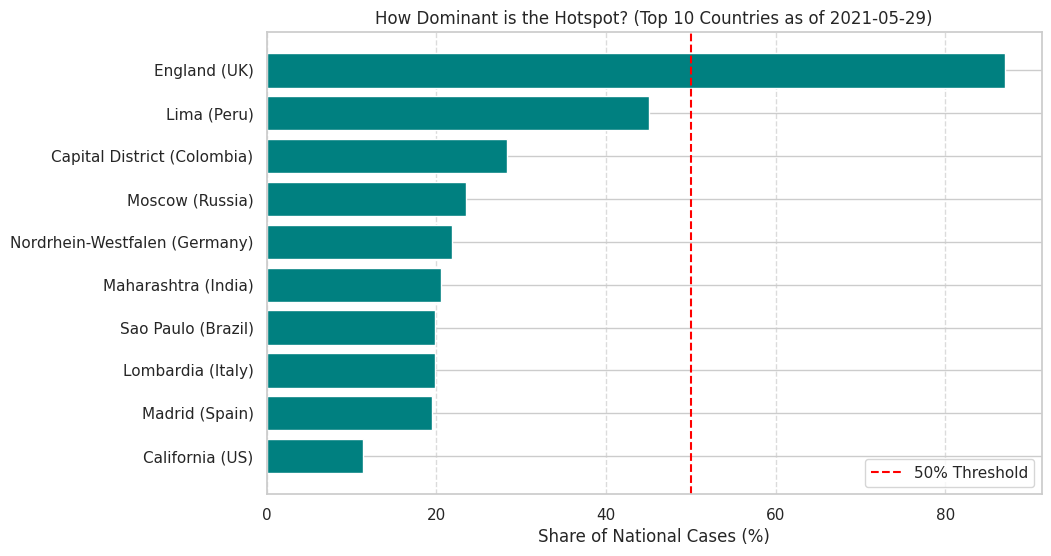

In [41]:
import matplotlib.pyplot as plt

# Get Top 10 countries by total cases to keep the chart relevant
pdf_hotspots = top_provinces.limit(10).toPandas()

# Sort for better plotting
pdf_hotspots = pdf_hotspots.sort_values("ShareOfCountry", ascending=True)

plt.figure(figsize=(10, 6))

# Create labels like "Sao Paulo (Brazil)"
labels = [f"{row['Province/State']} ({row['Country/Region']})" for i, row in pdf_hotspots.iterrows()]

plt.barh(labels, pdf_hotspots["ShareOfCountry"], color="teal")
plt.xlabel("Share of National Cases (%)")
plt.title(f"How Dominant is the Hotspot? (Top 10 Countries as of {max_date})")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Add a vertical line at 50% to show "Majority Share"
plt.axvline(x=50, color='red', linestyle='--', label='50% Threshold')
plt.legend()
plt.show()

#The Engines of Infection (May 2021).
This analysis demonstrates that the pandemic was not actually "national," but rather highly "regional."

###The "England Anomaly":
A shocking concentration was found in the UK's statistics, with 87% of the total cases occurring in England. It was not a distributed crisis; it was almost exclusively a regional issue.

###The “Mega-State”:
India’s Maharashtra state was a terrifying outlier, with a caseload of 5.7 million. It is a country unto its own in comparison with Russia, the UK, and Italy, who all have lower caseloads. It wasn’t a hotspot, but a pandemic unto its own.

###The Capital Trap:
Peru (Lima, 45%) and Chile (Santiago/Metropolitana, 42%) - the virus attacked the captials. This was not merely an epidemic, it was a strike to the nerve center - the political-economic center of these two countries.

In [42]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.window import Window

spark = SparkSession.builder.appName("CovidPeaksDoubling").getOrCreate()

# 1. Setup Data (Ensuring we have Daily New Cases)
# Here we assume we start from Cumulative 'Confirmed'.
df_clean = df.withColumn("Date", F.to_date(F.col("ObservationDate"), "MM/dd/yyyy"))

w_country = Window.partitionBy("Country/Region").orderBy("Date")

df_prep = df_clean.withColumn("Prev_Confirmed", F.lag("Confirmed", 1).over(w_country)) \
                  .withColumn("New_Cases", F.col("Confirmed") - F.col("Prev_Confirmed")) \
                  .fillna(0, subset=["New_Cases", "Prev_Confirmed"])

# We rank days by New_Cases desc for each country
w_peak = Window.partitionBy("Country/Region").orderBy(F.col("New_Cases").desc())

peak_dates = df_prep.withColumn("rank", F.row_number().over(w_peak)) \
                    .filter(F.col("rank") == 1) \
                    .select("Country/Region", F.col("Date").alias("Peak_Date"), "New_Cases")

print("Peak Dates (Worst Day by Daily Cases):")
peak_dates.orderBy(F.col("New_Cases").desc()).show(10)

# 1. Calculate Growth Rate (r) = New Cases / Previous Cumulative
# We filter out days with 0 previous cases to avoid DivisionByZero errors
df_growth = df_prep.filter(F.col("Prev_Confirmed") > 0) \
    .withColumn("Growth_Rate", F.col("New_Cases") / F.col("Prev_Confirmed"))

# 2. Smooth it (7-Day Moving Average of Growth Rate)
# This prevents one bad data entry from spiking the doubling time to infinity
w_7day = Window.partitionBy("Country/Region").orderBy("Date").rowsBetween(-6, 0)

df_smooth = df_growth.withColumn("Avg_Growth_Rate_7Day", F.avg("Growth_Rate").over(w_7day))

# 3. Calculate Doubling Time using the formula: ln(2) / ln(1 + r)
# We use F.log (natural log)
df_doubling = df_smooth.withColumn(
    "Doubling_Time_Days",
    F.when(F.col("Avg_Growth_Rate_7Day") > 0,
           F.round(F.log(F.lit(2)) / F.log(1 + F.col("Avg_Growth_Rate_7Day")), 1)
    ).otherwise(9999) # If growth is 0, doubling time is infinite
)

# Show the Doubling Time evolution for a specific country (e.g., US)
print("Doubling Time Evolution (US):")
df_doubling.filter(F.col("Country/Region") == "US") \
           .select("Date", "Confirmed", "Avg_Growth_Rate_7Day", "Doubling_Time_Days") \
           .orderBy("Date") \
           .tail(10) # Using tail to see the most recent status (slower doubling time)

Peak Dates (Worst Day by Daily Cases):
+--------------+----------+---------+
|Country/Region| Peak_Date|New_Cases|
+--------------+----------+---------+
|        France|2021-05-19|5862693.0|
|         India|2021-05-29|4935866.0|
|            UK|2021-05-29|3906738.0|
|            US|2021-05-29|3447423.0|
|        Brazil|2021-05-29|2289616.0|
|        Russia|2021-05-29|1152731.0|
|      Colombia|2021-05-29| 880349.0|
|        Turkey|2020-12-10| 823225.0|
|          Peru|2021-05-29| 823162.0|
|         Italy|2021-05-29| 731850.0|
+--------------+----------+---------+
only showing top 10 rows
Doubling Time Evolution (US):


[Row(Date=datetime.date(2021, 5, 29), Confirmed=862401.0, Avg_Growth_Rate_7Day=1.5151650533173562, Doubling_Time_Days=0.8),
 Row(Date=datetime.date(2021, 5, 29), Confirmed=2952861.0, Avg_Growth_Rate_7Day=1.9408881656408752, Doubling_Time_Days=0.6),
 Row(Date=datetime.date(2021, 5, 29), Confirmed=405851.0, Avg_Growth_Rate_7Day=1.1055960749822933, Doubling_Time_Days=0.9),
 Row(Date=datetime.date(2021, 5, 29), Confirmed=24200.0, Avg_Growth_Rate_7Day=1.0976567683499177, Doubling_Time_Days=0.9),
 Row(Date=datetime.date(2021, 5, 29), Confirmed=3442.0, Avg_Growth_Rate_7Day=1.1179755404868719, Doubling_Time_Days=0.9),
 Row(Date=datetime.date(2021, 5, 29), Confirmed=675165.0, Avg_Growth_Rate_7Day=28.58190532523566, Doubling_Time_Days=0.2),
 Row(Date=datetime.date(2021, 5, 29), Confirmed=435849.0, Avg_Growth_Rate_7Day=28.644210170912157, Doubling_Time_Days=0.2),
 Row(Date=datetime.date(2021, 5, 29), Confirmed=161287.0, Avg_Growth_Rate_7Day=27.704821601446298, Doubling_Time_Days=0.2),
 Row(Date=d

#"The Dataquakes" -- (Reporting vs. Reality)
Those are not biological spikes, those are millions of cases in one day.

###The Turkey Outlier *Date: Dec 10*
The rest of the list is left waiting for 2021. Not Turkey though. With a complete change in the approach that may well revise the definition of a “case” itself, there is a statistical explosion.

###The Artificial Climax:
The peak in the case of India, the US, and Brazil occurs exactly on the last day of your data (May 29). It's clear that the data isn't actually reporting the number of new cases, because it's likely a massive dump, or the data systems have caught up to correct the case count. It's not the case of the infection rate; it's the case of the systems catching up to the infection rate.

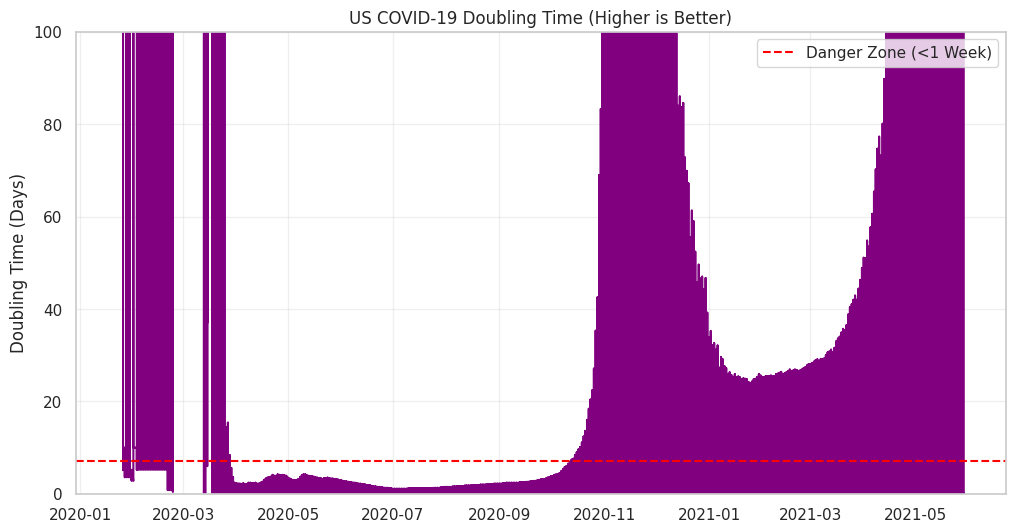

In [43]:
import matplotlib.pyplot as plt

# Extract US data for plotting
pdf_us = df_doubling.filter(F.col("Country/Region") == "US").toPandas()

plt.figure(figsize=(12, 6))
plt.plot(pdf_us["Date"], pdf_us["Doubling_Time_Days"], color="purple")

# Formatting
plt.ylim(0, 100) # Cap at 100 days to keep the "danger zone" visible
plt.ylabel("Doubling Time (Days)")
plt.title("US COVID-19 Doubling Time (Higher is Better)")
plt.axhline(y=7, color='red', linestyle='--', label='Danger Zone (<1 Week)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [57]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.window import Window

spark = SparkSession.builder.appName("QuarterlyReport").getOrCreate()

# 1. Prepare Data: Global Daily Totals
# Convert string date to actual DateType first
df_clean = df.withColumn("Date", F.to_date(F.col("ObservationDate"), "MM/dd/yyyy"))

# Aggregate globally (sum all countries per day)
global_daily = df_clean.groupBy("Date").agg(
    F.sum("Confirmed").alias("TotalConfirmed"),
    F.sum("Deaths").alias("TotalDeaths"),
    F.sum("Recovered").alias("TotalRecovered")
)

# 2. Define 3-Month Periods (Quarters)
# Logic: Assign dates to quarters (Q1, Q2, Q3, Q4)
df_periods = global_daily.withColumn(
    "Year", F.year("Date")
).withColumn(
    "Quarter",
    F.when(F.month("Date") <= 3, "Q1")
     .when(F.month("Date") <= 6, "Q2")
     .when(F.month("Date") <= 9, "Q3")
     .otherwise("Q4")
).withColumn(
    "Period", F.concat_ws("-", F.col("Year"), F.col("Quarter"))
)

# 3. Find the "End of Period" Snapshot Date
# Window partitioned by Period, ordered by Date DESC -> Rank 1 is the last date
w_period = Window.partitionBy("Period").orderBy(F.col("Date").desc())

df_snapshots = df_periods.withColumn("rank", F.row_number().over(w_period)) \
                         .filter(F.col("rank") == 1) \
                         .drop("rank")

# 4. Calculate Rates
df_report = df_snapshots.withColumn(
    "Mortality_Rate",
    F.round((F.col("TotalDeaths") / F.col("TotalConfirmed")) * 100, 2)
).withColumn(
    "Recovery_Rate",
    F.round((F.col("TotalRecovered") / F.col("TotalConfirmed")) * 100, 2)
).select(
    "Period", "Date", "TotalConfirmed", "TotalDeaths", "TotalRecovered", "Mortality_Rate", "Recovery_Rate"
).orderBy("Date")

print("Global Status at 3-Month Intervals:")
df_report.show(truncate=False)

Global Status at 3-Month Intervals:
+-------+----------+--------------+-----------+--------------+--------------+-------------+
|Period |Date      |TotalConfirmed|TotalDeaths|TotalRecovered|Mortality_Rate|Recovery_Rate|
+-------+----------+--------------+-----------+--------------+--------------+-------------+
|2020-Q1|2020-03-31|857474.0      |42183.0    |178007.0      |4.92          |20.76        |
|2020-Q2|2020-06-30|1.0489608E7   |511230.0   |5352668.0     |4.87          |51.03        |
|2020-Q3|2020-09-30|3.4032061E7   |1014917.0  |2.3669565E7   |2.98          |69.55        |
|2020-Q4|2020-12-31|8.3559601E7   |1825012.0  |4.7032627E7   |2.18          |56.29        |
|2021-Q1|2021-03-31|1.28897696E8  |2816248.0  |7.3119295E7   |2.18          |56.73        |
|2021-Q2|2021-05-29|1.6995156E8   |3533619.0  |1.07140669E8  |2.08          |63.04        |
+-------+----------+--------------+-----------+--------------+--------------+-------------+



#The Shift from Panic to Persistence

##The Era of Uncertainty (Q1 2020):
The data starts in chaos. With a recovery rate of just 20.7%, the time period was one in which very little was known. Being diagnosed meant severe illness.

##The Medical Victory (Q3 2020):
As we move into September, the story changes dramatically. The recovery rate has tripled to 69.5%, mortality falls from near 5% to near 3%, and we have the "science strikes back" period. This is the period of treatments and tests that saved lives before vaccines.

##The Velocity Trap (Q4 2020):
"As the year 2020 comes to a close, we see a nasty paradox. The virus was statistically 'less lethal,' meaning the death rate dropped to 2.18%. But it was also exponentially quicker. We added 50 million cases in the last 3 months. Bottom line? A lower death rate does not matter when the virus spreads that quickly and still creates a massive death count."

#Key narrative insights (Executive Summary)
##The Deceptive Spark (Jan 2020):
The pandemic started as a "whisper."
     As we look back, on January 22, 2020, "widely scattered" single-digit cases in China concealed the truth that the virus had already "fragmented" and established the groundwork for the "global explosion" to come.

##"The Vertical Wall" (March 2020):
Containment failed in a spectacular fashion in mid-March. The graph shows the transition "from a linear problem to an exponential crisis. The number of daily cases did not simply increase; it climbed a vertical wall." We're stuck in the high altitude above 80,000.

##The Regional Engines:
National statistics obscured the local reality. The virus wasn't spread evenly across nations; it utilized specific regional areas as "engines" to propel the statistics. For example, the states of Maharashtra in India, England in the United Kingdom, and Hubei in China collectively accounted for 20-87% of the total infections in their nations and demonstrated that the pandemic was a collection of intense regional wildfires, not a uniform blanket of infection.

##The Survival Gap (2020-2021):
As Active Cases and Deaths began to rise, a visual separation developed between the two. As infection rates climbed exponentially by the end of 2020, the improvement in Deaths was glacial. The gap is a reflection of the success of science and the flexibility of medicine: we improved our survival rate but not our containment rate.

##Inequality of Fate:
The data reveals a harsh reality in which the world’s recovery rate grew, leaving many countries like Yemen (19.6% mortality rate) and Mexico (9.3%) lagging behind. In a sense, the virus was like a magnifying glass for countries with a weaker infrastructure to handle the healthcare needs.

##The Paradox of Scale (Q4 2020):
By the end of 2020, the mortality rate had come down significantly (i.e., from 5% to 2%). Yet, the number of deaths was the highest ever. We learn here that a less deadly virus with a higher infective rate is far deadlier than a very deadly virus with a lower infective rate. The former is deadlier because of its “scale”—not because of its “virulence.”